
# Project: Tmdb Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
# Introduction
The data set used in this report includes movie data from 1966 to 2015. In this report we will try to answer three main questions:

#1- which genres has the larget revenue in 2015?
#2- What is the 3 most produced genres for 2015?
#3- Does the runtime affect the profitability of a moive?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
# Data Wrangling


## General Properties

In [2]:
# first of all we need to import and take an overview about the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data formatting and cleaning

In [3]:
# Removing any duplicates
df.drop_duplicates(keep ='first', inplace=True)

In [4]:
# Since we have muliple genres in 'genres', we will ues the first one only
df[['genre','g2','g3','g4','g5']] = df['genres'].str.split('|',expand = True)
# Now we will drop g2 - g5
df.drop(['g2','g3','g4','g5'],axis = 1, inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [6]:
# we will drop (id, imdb_id, director, cast, homepage, tagline, keywords, overview, genres, production_companies, release_date, budget_adj, revenue_adj)
# because we are not goinng to use them 

droped = df.drop(['id', 'imdb_id', 'director','cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'],axis = 1)

In [7]:
droped

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,genre
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,Action
2,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,Action
4,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,Action
...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,11,7.4,1966,Documentary
10862,0.065543,0,0,Grand Prix,176,20,5.7,1966,Action
10863,0.065141,0,0,Beregis Avtomobilya,94,11,6.5,1966,Mystery
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,22,5.4,1966,Action


In [8]:
droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   vote_count      10865 non-null  int64  
 6   vote_average    10865 non-null  float64
 7   release_year    10865 non-null  int64  
 8   genre           10842 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 848.8+ KB


In [9]:
#We need to check remove the nulls from 'genre'
sum(droped['genre'].isnull())

23

In [10]:
#Since genre have 23 nulls we will drop these rows
droped.dropna(subset=['genre'], how = 'all',inplace = True)

In [11]:
#Now we check for zeros in the data 
droped.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [12]:
# we found zeros in budget and revenue
# Now we will remove the zeros from budget

temp = droped[droped['budget']!= 0]
temp.shape

(5168, 9)

In [13]:
# Now we will remove the zeros from revenue

temp2 = temp[temp['revenue']!= 0]
temp2.shape

(3854, 9)

In [14]:
temp2.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [15]:
# We can see that there are some outliers in runntime and popularity 
# outliers are the numbers above (mean + 3.5*SD) and that approximately equlas 180
# Now we will remove runtime higher than 180

temp3 = temp2[temp2['runtime']<= 180]
temp3.shape

(3821, 9)

In [16]:
# outliers are the numbers above (mean + 3.5*SD) and that approximately equlas 5.5
# Now we will remove runtime higher than 180

temp4 = temp3[temp3['popularity']<= 5.5]
temp4.shape

(3748, 9)

In [17]:
data = temp4
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3748.000000,3.748000e+03,3.748000e+03,3748.000000,3748.000000,3748.000000,3748.000000
mean,1.053344,3.569100e+07,9.691487e+07,108.034952,458.627001,6.141836,2001.233725
std,0.889783,3.992677e+07,1.433422e+08,17.588576,687.643213,0.781126,11.139809
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.455703,1.000000e+07,1.322467e+07,95.000000,69.000000,5.600000,1995.000000
50%,0.786867,2.300000e+07,4.293075e+07,105.000000,196.000000,6.200000,2004.000000
75%,1.323631,5.000000e+07,1.191203e+08,118.000000,538.000000,6.700000,2010.000000
max,5.488441,4.250000e+08,1.215440e+09,180.000000,7080.000000,8.400000,2015.000000


<a id='eda'></a>
# Exploratory Data Analysis


## which genres has the larget revenue in 2015?

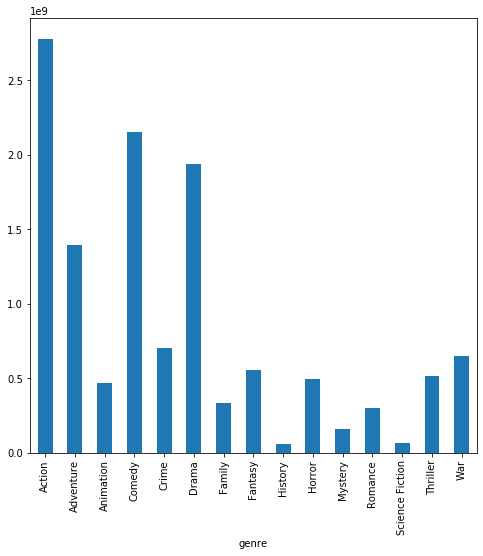

In [18]:
#First we will assagin df2015 to only have the data for 2015

df2015 = data[data['release_year'] == 2015]

# We will use a bar chart to find which genrehas the larget revenue

df2015.groupby('genre')['revenue'].sum().plot(kind = 'bar',figsize = (8,8));

#### As we can see from the bar chat the genres with the larget revenue  in 2015 are (Action, Comedy and Daram)

## What is the 3 most produced genres for 2015?

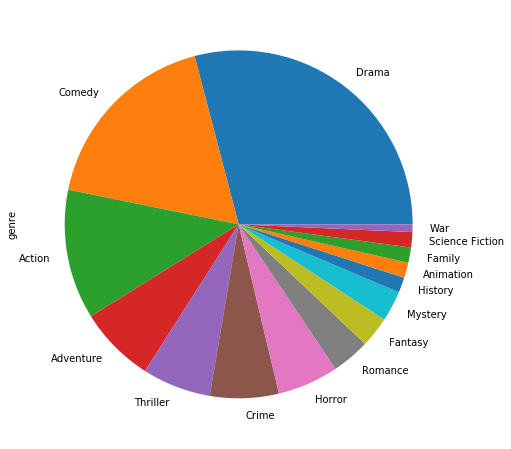

In [19]:
# We will use a pie chart to find what is the most prduced genre

df2015['genre'].value_counts().plot(kind = 'pie', figsize = (8,8));

#### As we can see from the pie chat the 3 most produced genres for 2015 are (Daram, Comedy and Action)

## Does the runtime affect the profitability of a moive?

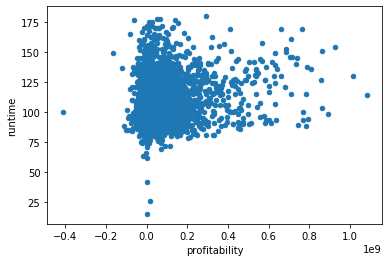

In [20]:
# First we need to add a profitability column to the data (profitability = revenue - budget)
prof = data
prof.insert(2, 'profitability', prof['revenue'] - prof['budget'], False)
prof.plot(kind = 'scatter', x = 'profitability', y = 'runtime');

##### As we can see there is no relation between profitability and runtime, so the answer is no.

<a id='conclusions'></a>
# Conclusions

In conclusion, the data set was limed in some areas. Forexample, the revenue and budget cloumns were missing a lot of data, also the cast, the genre and the production companies columns were clustered and not easy to work with. 


Findings: 

1- The genres with the larget revenue in 2015 are (Action, Comedy and Daram) 

2- The 3 most produced genres for 2015 are (Daram, Comedy and Action) 

3- There is no relation between profitability and runtime.

Presented by: Abdulrahamn Alsulaiman